## Visualize and upload dataset to Amazon S3

### Import packages

In [15]:
import boto3
import sagemaker
import pandas as pd
import matplotlib.pyplot as plt

### Create a sagemaker_session

In [9]:
boto_session = boto3.Session()
sagemaker_boto_client = boto_session.client('sagemaker')

sagemaker_session = sagemaker.session.Session(
    boto_session=boto_session,
    sagemaker_client=sagemaker_boto_client)

### Use the default Amazon S3 bucket for dataset and results 

In [10]:
default_bucket = sagemaker_session.default_bucket()  # Alternatively you can use your custom bucket here.

prefix = 'sagemaker-tutorial'  # use this prefix to store all files pertaining to this workshop.
data_prefix = prefix + '/data'

### Visualize the dataset

In [11]:
local_data_dir = './data'
df = pd.read_excel('./data/default_of_credit_card.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
print(f'Total number of missing values in the data: {df.isnull().sum().sum()}')

Total number of missing values in the data: 0


([<matplotlib.axis.XTick at 0x7f413ab39e90>,
 <a list of 2 Text xticklabel objects>)

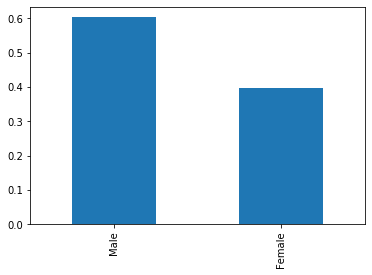

In [16]:
# plot the bar graph customer gender
df['SEX'].value_counts(normalize=True).plot.bar()
plt.xticks([0,1], ['Male', 'Female'])

Text(0.5, 0, 'Clients Age Distribution')

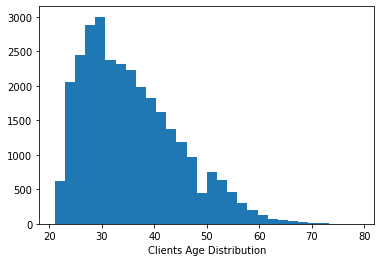

In [17]:
# plot the age distribution
plt.hist(df['AGE'], bins=30)
plt.xlabel('Clients Age Distribution')

In [12]:
df.to_csv('./data/dataset_unchanged.csv', index=False)

response = sagemaker_session.upload_data(f'{local_data_dir}/dataset_unchanged.csv', 
                                         bucket=default_bucket,
                                         key_prefix=data_prefix)
print(response)

s3://sagemaker-us-west-2-453691756499/sagemaker-tutorial/data/dataset_unchanged.csv
